 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_file_path = Path("Resources/whale_returns.csv")
whale_file_data = pd.read_csv(whale_file_path)

In [4]:
# Count nulls
whale_file_data.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_file_data = whale_file_data.dropna()

# Check data types
whale_file_data.dtypes

Date                            object
SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [6]:
# Fix Date data type
whale_file_data.Date = whale_file_data.Date.astype('datetime64')

In [7]:
# Index on Date
whale_file_data.set_index(pd.to_datetime(whale_file_data['Date'], infer_datetime_format=True), inplace=True)
whale_file_data.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [8]:
# Drop extra date column 
whale_file_data.drop(columns=['Date'], inplace=True)
whale_file_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algo_file_path = Path("Resources/algo_returns.csv")
algo_file_data = pd.read_csv(algo_file_path)

In [10]:
# Count nulls
algo_file_data.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_file_data = algo_file_data.dropna()

In [12]:
# Check Data Types
algo_file_data.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [13]:
# Fix Date Data type
algo_file_data.Date = algo_file_data.Date.astype('datetime64')

In [14]:
# Index on Date
algo_file_data.set_index(pd.to_datetime(algo_file_data['Date'], infer_datetime_format=True), inplace=True)
algo_file_data.head()

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761


In [15]:
# Drop extra date column
algo_file_data.drop(columns=['Date'], inplace=True)
algo_file_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [16]:
# Reading S&P 500 Closing Prices
sp_500_file_path = Path("Resources/sp500_history.csv")
sp_500_file_data = pd.read_csv(sp_500_file_path)

In [17]:
# Check Data Types
sp_500_file_data.dtypes

Date     object
Close    object
dtype: object

In [18]:
# Fix Data Types
sp_500_file_data.Date = sp_500_file_data.Date.astype('datetime64')

In [19]:
sp_500_file_data['Close'] = sp_500_file_data['Close'].str.replace('$', '')
sp_500_file_data.Close = sp_500_file_data.Close.astype('float')

In [20]:
# Calculate Daily Returns
sp_500_file_data.set_index(pd.to_datetime(sp_500_file_data['Date'], infer_datetime_format=True), inplace=True)
sp_500_file_data.head()

,Date,Close
Date,,
2019-04-23,2019-04-23,2933.68
2019-04-22,2019-04-22,2907.97
2019-04-18,2019-04-18,2905.03
2019-04-17,2019-04-17,2900.45
2019-04-16,2019-04-16,2907.06


In [21]:
sp_500_file_data.drop(columns=['Date'], inplace=True)
sp_500_file_data.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [22]:
sp500_daily_return = sp_500_file_data.pct_change()
sp500_daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [23]:
# Drop nulls
sp500_daily_return = sp500_daily_return.dropna()

In [24]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_return.rename(columns={'Close':'S&P 500'}, inplace= True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [25]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([sp500_daily_return,algo_file_data,whale_file_data], axis="columns", join="inner")
combined_returns.head()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

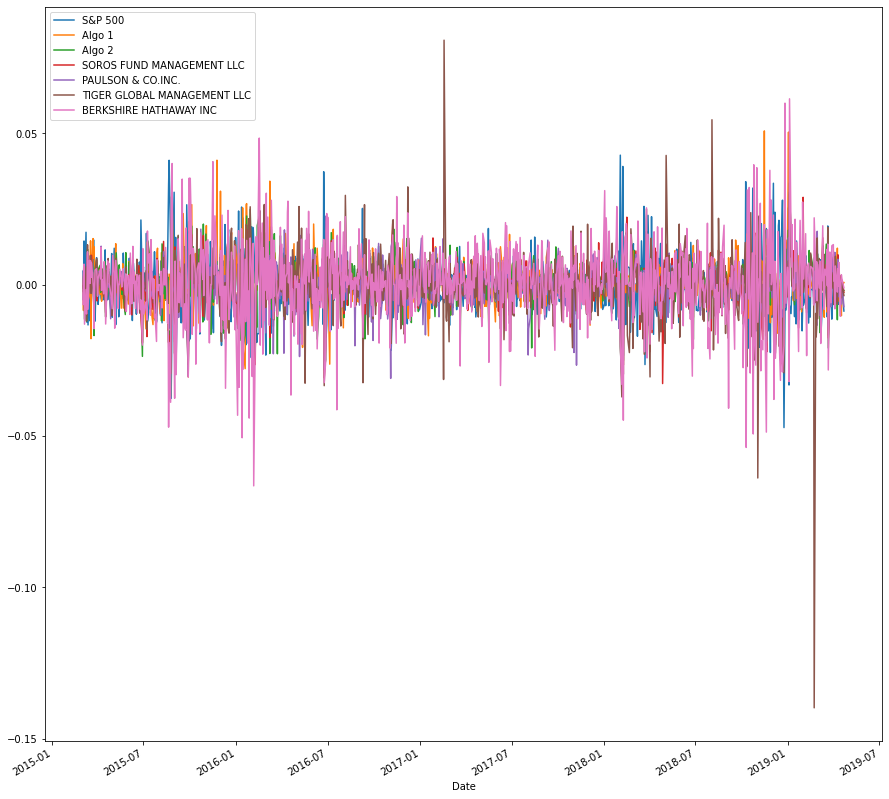

In [26]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize = (15,15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

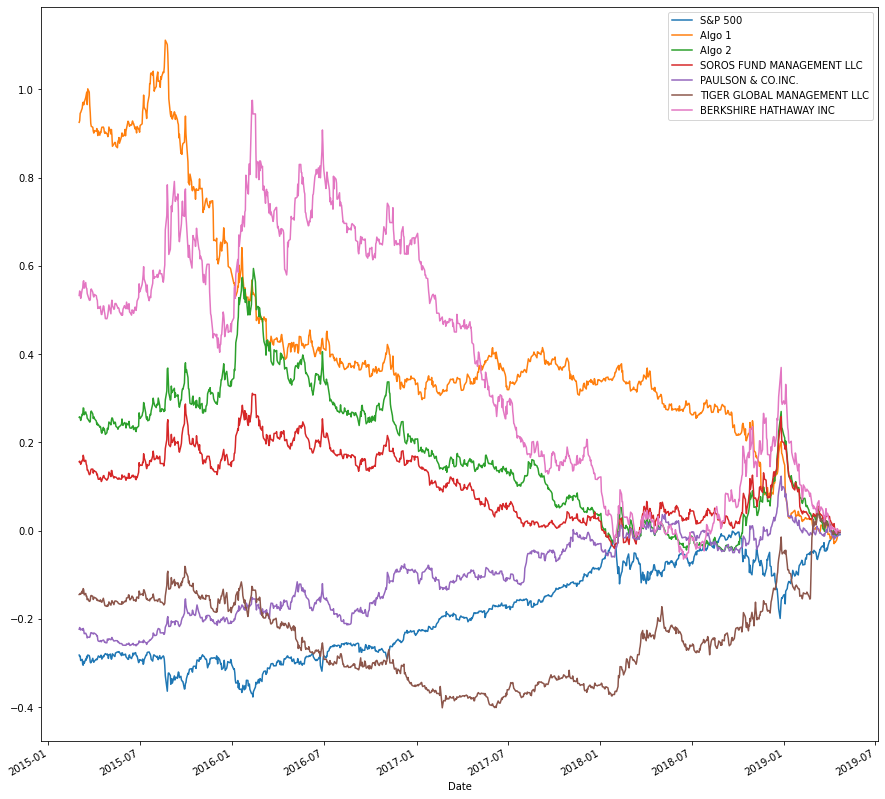

In [27]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
# Plot cumulative returns

cumulative_returns.plot(figsize = (15,15))

In [28]:
cumulative_returns.head()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.009766,0.000088,-0.003163,-0.001142,-0.006120,-0.003061,0.000826
2019-04-17,-0.011327,-0.010214,-0.008374,-0.004035,-0.012547,-0.007457,0.004051
2019-04-16,-0.009074,-0.017087,-0.005499,-0.001346,-0.012164,-0.008282,0.004891
2019-04-15,-0.009578,-0.021345,-0.010046,-0.002767,-0.013306,-0.007887,-0.005653


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

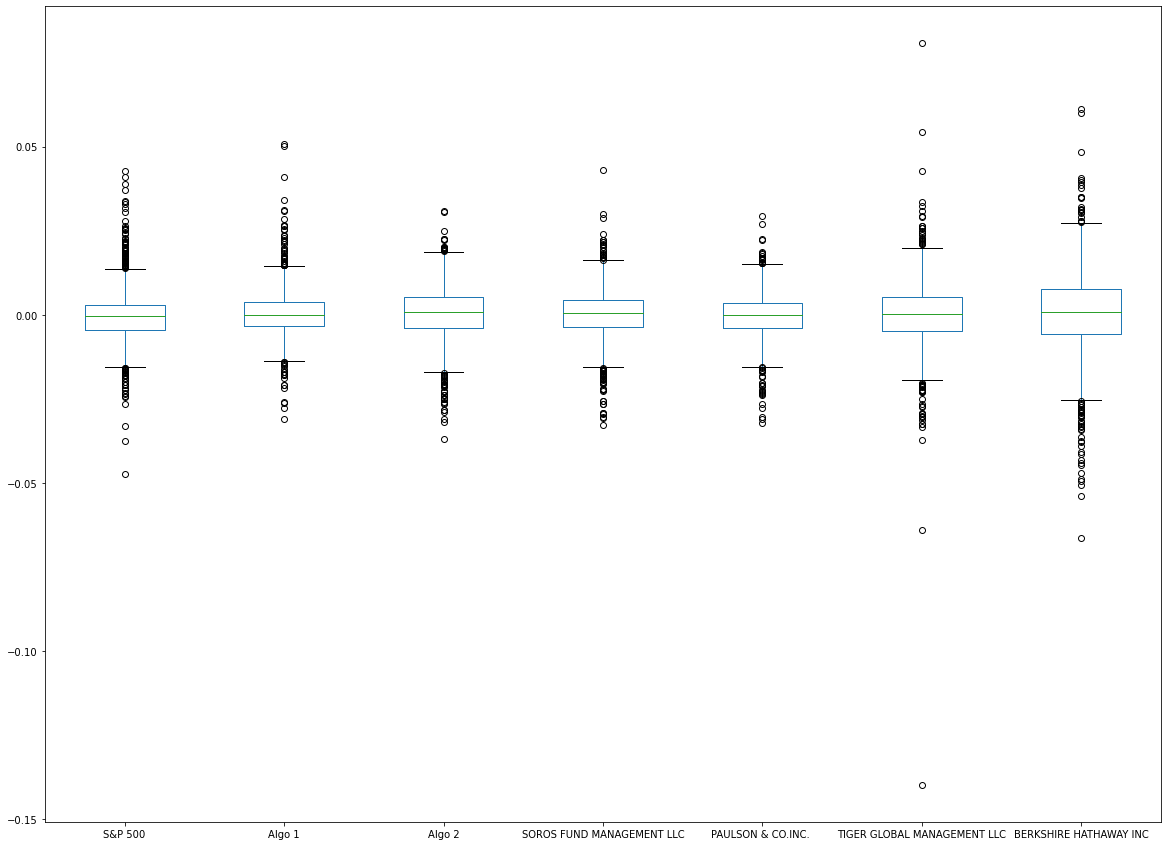

In [29]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(20,15))

### Calculate Standard Deviations

In [30]:
# Calculate the daily standard deviations of all portfolios
combined_returns_std = pd.DataFrame(combined_returns.std())
combined_returns_std.head()

,0
S&P 500,0.008587
Algo 1,0.007623
Algo 2,0.008341
SOROS FUND MANAGEMENT LLC,0.007896
PAULSON & CO.INC.,0.007026


In [31]:
combined_returns_std.rename(columns = {0:"Standard Dev"})

,Standard Dev
S&P 500,0.008587
Algo 1,0.007623
Algo 2,0.008341
SOROS FUND MANAGEMENT LLC,0.007896
PAULSON & CO.INC.,0.007026
TIGER GLOBAL MANAGEMENT LLC,0.010897
BERKSHIRE HATHAWAY INC,0.012919


### Determine which portfolios are riskier than the S&P 500

In [32]:
# Calculate  the daily standard deviation of S&P 500
std_sp500 = pd.DataFrame(sp500_daily_return.std())
std_sp500.head()
    

,0
S&P 500,0.008135


In [33]:
# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = combined_returns_std[combined_returns_std.iloc[:,0]> 0.008135 ]     
print(riskier_portfolios)

                                    0
S&P 500                      0.008587
Algo 2                       0.008341
TIGER GLOBAL MANAGEMENT LLC  0.010897
BERKSHIRE HATHAWAY INC       0.012919


### Calculate the Annualized Standard Deviation

In [34]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns_std * np.sqrt(252)
annualized_std.rename(columns = {0:"Standard Dev"})

,Standard Dev
S&P 500,0.136313
Algo 1,0.121006
Algo 2,0.132413
SOROS FUND MANAGEMENT LLC,0.125348
PAULSON & CO.INC.,0.111527
TIGER GLOBAL MANAGEMENT LLC,0.172989
BERKSHIRE HATHAWAY INC,0.205079


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

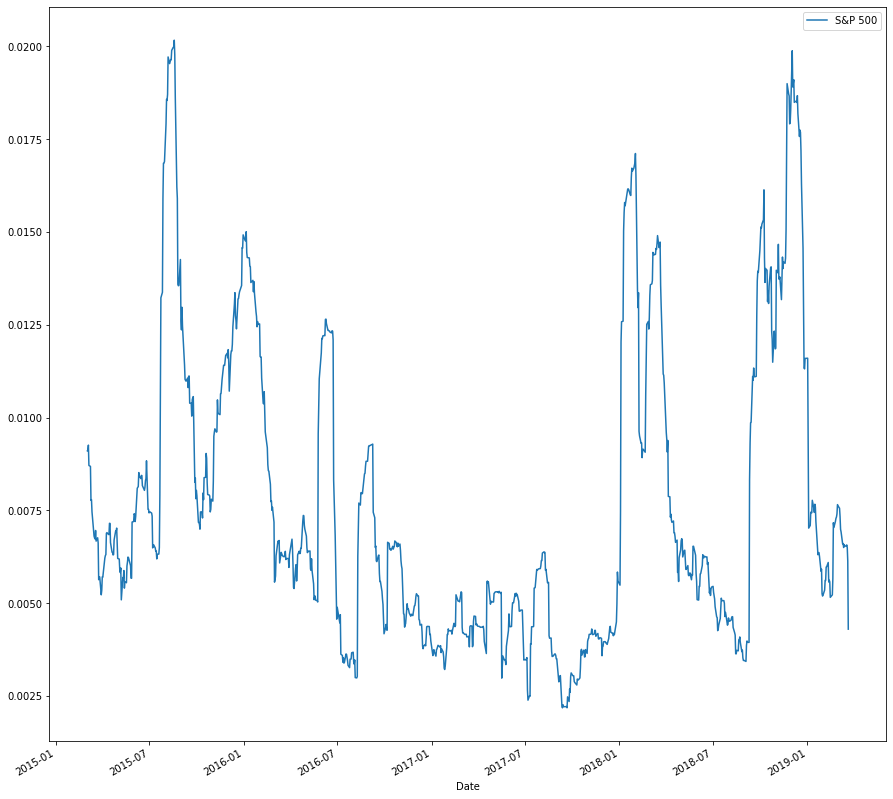

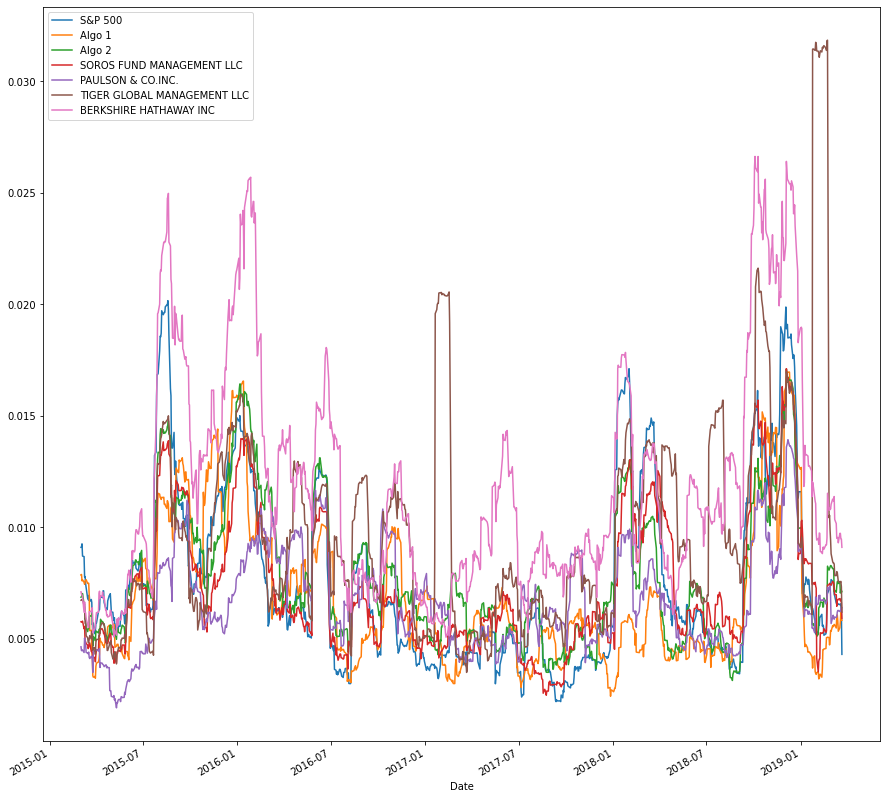

In [35]:
# Calculate the rolling standard deviation for SP 500 using a 21-day window
sp500_rolling_21 = combined_returns[["S&P 500"]].rolling(window = 21).std()
sp500_rolling_21.plot(figsize = (15,15))
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_day = combined_returns.rolling(window=21).std()
rolling_21_day = rolling_21_day.dropna()

# Plot the rolling standard deviation
rolling_21_day.plot(figsize = (15,15))

### Calculate and plot the correlation

In [36]:


# Calculate the correlation
correlation = combined_returns.corr()

# Display de correlation matrix
correlation

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P 500,1.000000,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856
Algo 1,-0.033963,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678
Algo 2,-0.002192,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756
SOROS FUND MANAGEMENT LLC,0.000574,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157
PAULSON & CO.INC.,0.013549,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125
BERKSHIRE HATHAWAY INC,-0.013856,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000


In [37]:
correlation.sum(axis=0).sort_values()

S&P 500                        0.962607
Algo 1                         2.299213
TIGER GLOBAL MANAGEMENT LLC    3.089243
PAULSON & CO.INC.              3.639847
BERKSHIRE HATHAWAY INC         3.689310
Algo 2                         3.985390
SOROS FUND MANAGEMENT LLC      4.163224
dtype: float64

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'60 Day Rolling Beta'}, xlabel='Date'>

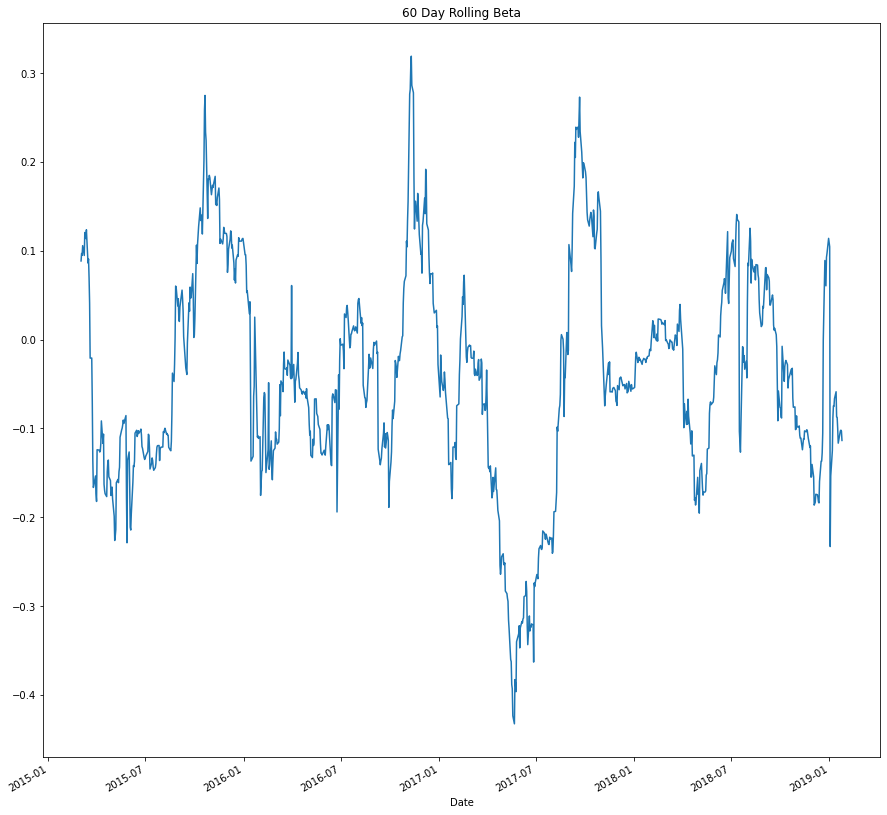

In [38]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['S&P 500'])
# Calculate variance of S&P 500
rolling_variance = combined_returns['S&P 500'].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(15,15), title ="60 Day Rolling Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

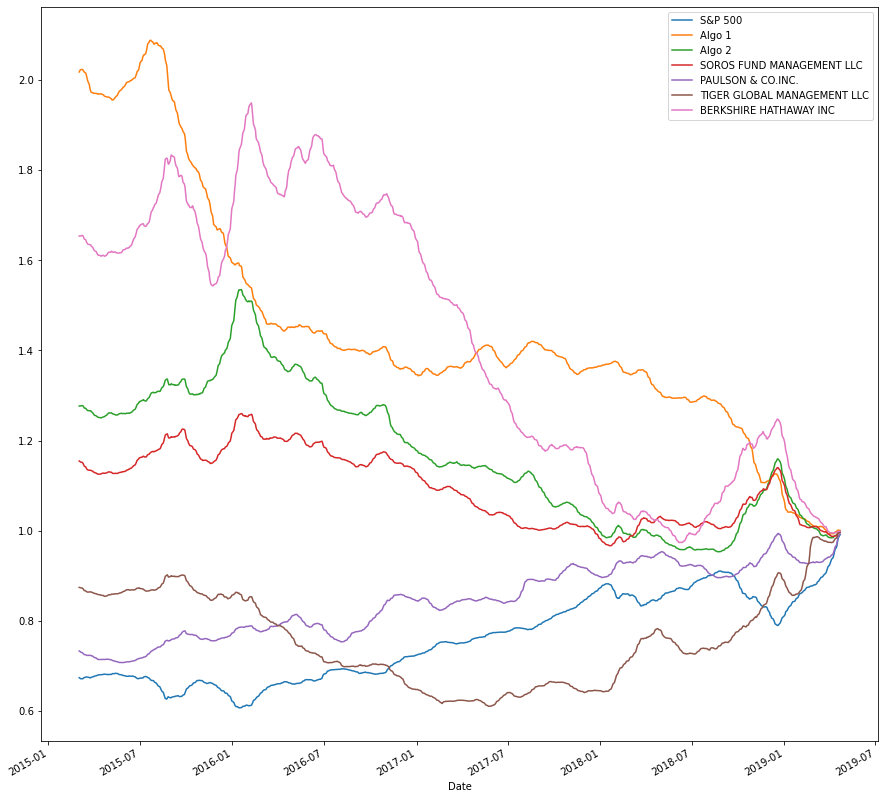

In [39]:
# Use `ewm` to calculate the rolling window
combined_returns_ewm = combined_returns.ewm(span=21,adjust=False).mean()
(1+combined_returns_ewm).cumprod().plot(figsize=(15,15))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

S&P 500                       -0.518582
Algo 1                         1.369589
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

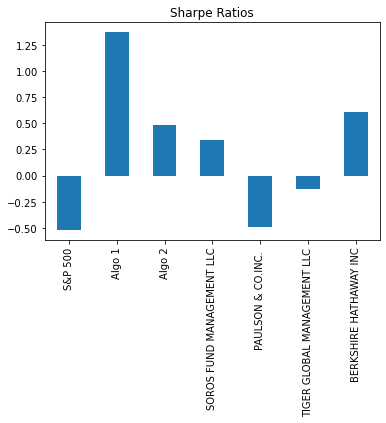

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
Algo 1 outperforms all portfolios, and algo 2 outperforms all portfolios except for Berhskire Hathaway Inc

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [42]:
# Reading data from 1st stock
boeing_path = Path("Resources/Boeing - BA.csv")
boeing_data = pd.read_csv(boeing_path)

# Check data types
boeing_data.dtypes

Date      object
Close    float64
dtype: object

In [43]:
# Correct date to date format
boeing_data.Date = boeing_data.Date.astype('datetime64')

In [44]:
# Index date
boeing_data.set_index(pd.to_datetime(boeing_data['Date'], infer_datetime_format=True), inplace=True)
boeing_data.head()

,Date,Close
Date,,
2019-12-16,2019-12-16,327.00
2019-12-17,2019-12-17,327.00
2019-12-18,2019-12-18,330.68
2019-12-19,2019-12-19,333.50
2019-12-20,2019-12-20,328.00


In [45]:
# Drop extra date column
boeing_data.drop(columns=['Date'], inplace=True)
boeing_data.head()

,Close
Date,
2019-12-16,327.00
2019-12-17,327.00
2019-12-18,330.68
2019-12-19,333.50
2019-12-20,328.00


In [46]:
# Reading data from 2nd stock

tesla_path = Path("Resources/Tesla - TSLA.csv")
tesla_data = pd.read_csv(tesla_path)

In [47]:
# check data types 
tesla_data.dtypes

Date      object
Close    float64
dtype: object

In [48]:
# Correct date to date format
tesla_data.Date = tesla_data.Date.astype('datetime64')

In [49]:
# Index date
tesla_data.set_index(pd.to_datetime(tesla_data['Date'], infer_datetime_format=True), inplace=True)
tesla_data.head()

,Date,Close
Date,,
2019-12-16,2019-12-16,76.30
2019-12-17,2019-12-17,75.80
2019-12-18,2019-12-18,78.63
2019-12-19,2019-12-19,80.81
2019-12-20,2019-12-20,81.12


In [50]:
# Drop extra date column
tesla_data.drop(columns=['Date'], inplace=True)
tesla_data.head()

,Close
Date,
2019-12-16,76.30
2019-12-17,75.80
2019-12-18,78.63
2019-12-19,80.81
2019-12-20,81.12


In [51]:
# Reading data from 3rd stock
ijr_path = Path("Resources/IJR - IJR.csv")
ijr_data = pd.read_csv(ijr_path)

In [52]:
# Check data types
ijr_data.dtypes

Date      object
Close    float64
dtype: object

In [53]:
# Correct date to date format
ijr_data.Date = ijr_data.Date.astype('datetime64')

In [54]:
# Index date
ijr_data.set_index(pd.to_datetime(ijr_data['Date'], infer_datetime_format=True), inplace=True)
ijr_data.head()

,Date,Close
Date,,
2019-12-16,2019-12-16,82.64
2019-12-17,2019-12-17,83.35
2019-12-18,2019-12-18,83.64
2019-12-19,2019-12-19,83.90
2019-12-20,2019-12-20,83.77


In [55]:
# Drop extra date column
ijr_data.drop(columns=['Date'], inplace=True)
ijr_data.head()

,Close
Date,
2019-12-16,82.64
2019-12-17,83.35
2019-12-18,83.64
2019-12-19,83.90
2019-12-20,83.77


In [56]:
# Combine all stocks in a single DataFrame
my_combined_portfolio = pd.concat((tesla_data, ijr_data, boeing_data), axis = 1 , join="inner")
my_combined_portfolio.sort_index(ascending = True, inplace = True)

In [57]:
my_combined_portfolio.columns = ["TSLA","IJR","BA"]

In [58]:
my_combined_portfolio.head()

,TSLA,IJR,BA
Date,,,
2019-12-16,76.30,82.64,327.00
2019-12-17,75.80,83.35,327.00
2019-12-18,78.63,83.64,330.68
2019-12-19,80.81,83.90,333.50
2019-12-20,81.12,83.77,328.00


In [59]:
# Reset Date index
my_combined_portfolio.index = my_combined_portfolio.index.normalize()

In [60]:
my_combined_portfolio.dropna(inplace=True)

In [61]:
my_combined_portfolio.head()

,TSLA,IJR,BA
Date,,,
2019-12-16,76.30,82.64,327.00
2019-12-17,75.80,83.35,327.00
2019-12-18,78.63,83.64,330.68
2019-12-19,80.81,83.90,333.50
2019-12-20,81.12,83.77,328.00


In [62]:
# Calculate daily returns
my_daily_returns = my_combined_portfolio.pct_change()

# Drop NAs
my_daily_returns = my_daily_returns.dropna()
# Display sample data
my_daily_returns.head()

,TSLA,IJR,BA
Date,,,
2019-12-17,-0.006553,0.008591,0.000000
2019-12-18,0.037335,0.003479,0.011254
2019-12-19,0.027725,0.003109,0.008528
2019-12-20,0.003836,-0.001549,-0.016492
2019-12-23,0.033531,0.001671,0.029116


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [63]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio = my_combined_portfolio.dot(weights)
my_returns = my_portfolio.pct_change()
my_returns = my_returns.dropna()
# Display sample data
my_returns.head()

Date
2019-12-17    0.000432
2019-12-18    0.013987
2019-12-19    0.010670
2019-12-20   -0.010678
2019-12-23    0.025178
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [64]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat((my_returns,combined_returns), axis=1, join='inner')
all_returns.rename(columns = {0:'My Portfolio'}, inplace = True)
all_returns.head()

,My Portfolio,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,


In [65]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = all_returns.dropna()

In [66]:
all_returns.head()

,My Portfolio,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [67]:
# Calculate the annualized `std`
my_returns_std = my_returns.std()
annualized_std = my_returns_std * np.sqrt(252)
print(annualized_std)

0.6842908846423281


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

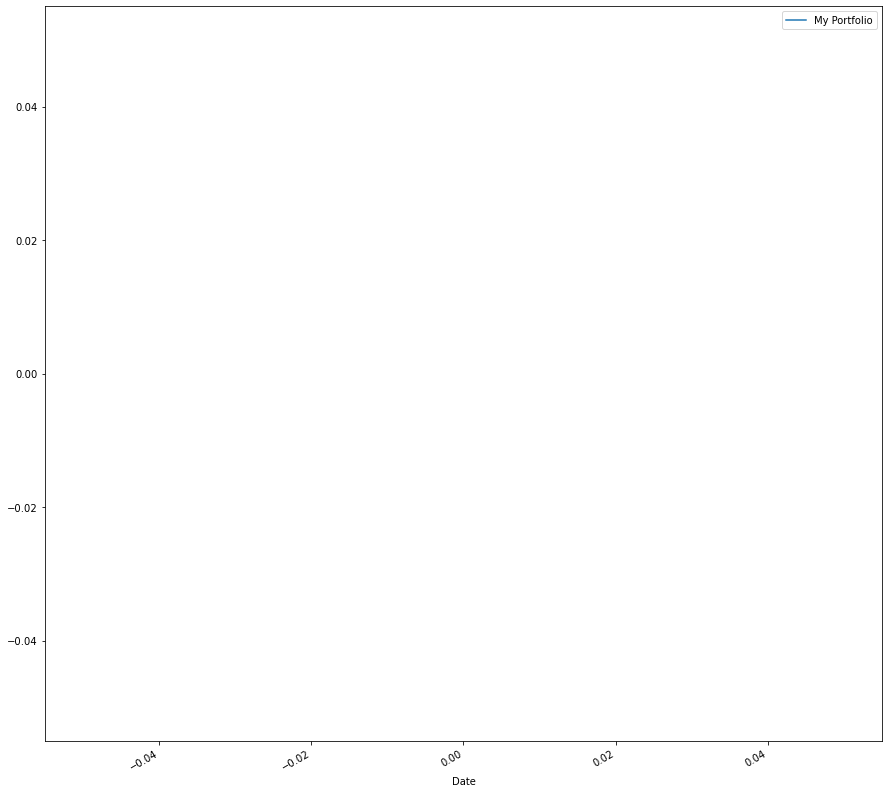

In [68]:
# Calculate rolling standard deviation
my_rolling_portfolio = all_returns[["My Portfolio"]].rolling(window=21).std()
# Plot rolling standard deviation
my_rolling_portfolio.plot(figsize=(15,15))

### Calculate and plot the correlation

In [69]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60 Day Rolling Beta'}, xlabel='Date'>

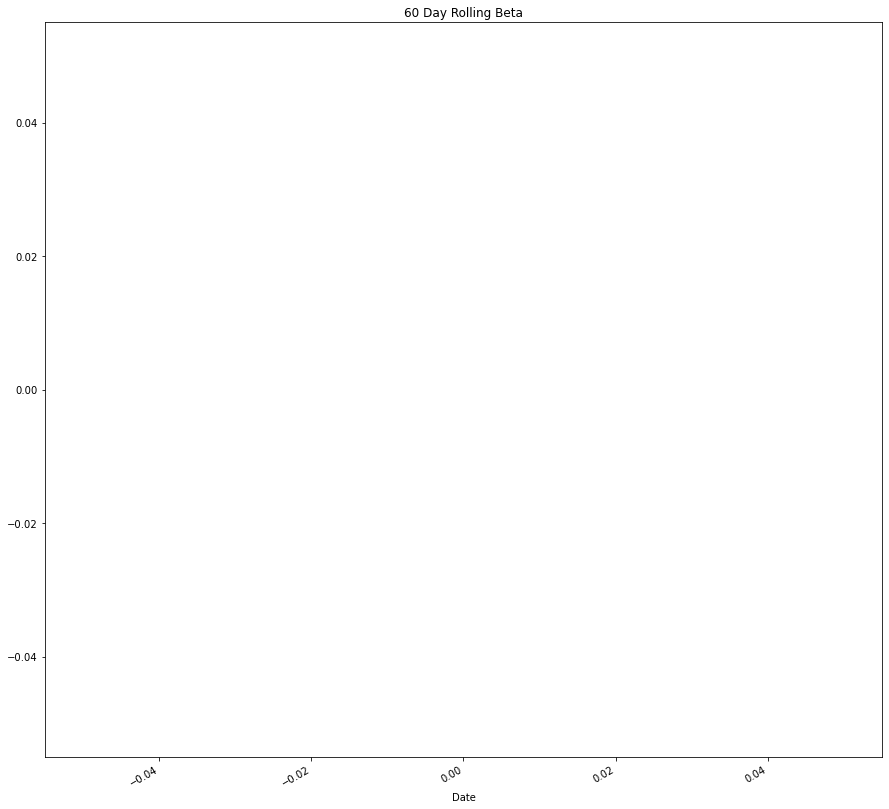

In [70]:
# Calculate and plot Beta
my_rolling_covariance = all_returns['My Portfolio'].rolling(window=60).cov(all_returns['S&P 500'])
# Calculate variance of S&P 500
my_rolling_variance = all_returns['S&P 500'].rolling(window=60).var()

# Computing beta
my_rolling_beta = my_rolling_covariance / my_rolling_variance
# Plot beta trend
my_rolling_beta.plot(figsize=(15,15), title ="60 Day Rolling Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [71]:
# Calculate Annualzied Sharpe Ratios
my_sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
my_sharpe_ratios

My Portfolio                  NaN
S&P 500                       NaN
Algo 1                        NaN
Algo 2                        NaN
SOROS FUND MANAGEMENT LLC     NaN
PAULSON & CO.INC.             NaN
TIGER GLOBAL MANAGEMENT LLC   NaN
BERKSHIRE HATHAWAY INC        NaN
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

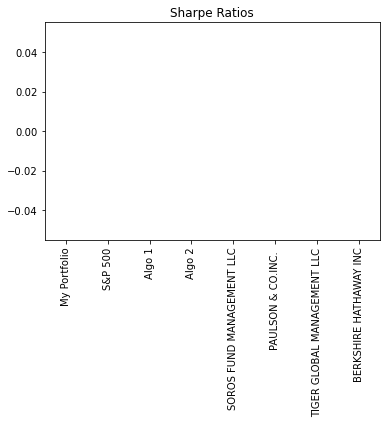

In [72]:
# Visualize the sharpe ratios as a bar plot
my_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!